# Preface

## Problem Breakdown

The following are questions that serve as a basis for the analysis:

1. [VIZ] How has the number of movies released changed from 2021 to 2023?
2. [VIZ] Which genres had the highest number of movies released each year from 2021 to 2023?
3. [VIZ] Which director released the most movies from 2021 to 2023?
4. [VIZ] How do movie ratings vary across different genres from 2021 to 2023?
5. [VIZ] How has the average movie duration changed from 2021 to 2023?
6. [VIZ] Which director had the highest average movie rating between 2021 and 2023?
7. [DESC] What are the mean, median, and standard deviation of movie ratings and durations from 2021 to 2023?
8. [DESC] Is there a significant relationship between movie duration and its rating for movies released from 2021 to 2023?
9. [INF] How are movie durations distributed across different genres from 2021 to 2023?
10. [INF] Was there a significant difference in average movie rating between 2021 and 2023?

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import f_oneway, pearsonr
import seaborn as sns

# Load Data

In [2]:
# Read file '16k_Movies.csv' into DataFrame and display DataFrame
df = pd.read_csv('16k_Movies.csv')

df.head()

,Unnamed: 0,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,0,Dekalog (1988),"Mar 22, 1996",This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,"Drama,Mystery,Romance"
2,2,The Conformist,"Oct 22, 1970","Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama
3,3,Tokyo Story,"Mar 13, 1972",Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",2 h 16 m,Drama
4,4,The Leopard (re-release),"Aug 13, 2004","Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",3 h 7 m,"Drama,History"


# Data Exploration

## Summary Information

Summary information can provide an overview of the dataset.

In [ ]:
# Display summary information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16290 entries, 0 to 16289
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           16290 non-null  int64  
 1   Title                16290 non-null  object 
 2   Release Date         16290 non-null  object 
 3   Description          16290 non-null  object 
 4   Rating               12846 non-null  float64
 5   No of Persons Voted  12829 non-null  object 
 6   Directed by          16283 non-null  object 
 7   Written by           15327 non-null  object 
 8   Duration             16277 non-null  object 
 9   Genres               16285 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB


Based on this summary information, it is known that:
- There are 16290 rows in 10 columns.
- The `Unnamed` column should be changed to an index, while `Release Date` is still an object type even though it should be datetime because it represents a date, and `No of Persons Voted` and `Duration` should be in integer format for numeric analysis purposes.
- Several columns, namely `Rating`, `No of Persons Voted`, `Directed by`, `Written by`, `Duration`, and `Genres`, have null values ​​that need to be handled so that they do not affect data analysis.
- Column names do not use the **Snake_Case** format, so they should be changed to be more consistent and easier to use in data analysis.

## Unique Value

Verification of column names and unique values ​​in each column is performed to ensure there are no spacing issues or data anomalies.

In [ ]:
# Check the first 5 unique values in each column
unique_values = df.apply(lambda x: x.unique()[:5])

# Display the first 5 unique values in each column
for column, values in unique_values.items():
	print(f"'{column}': {values.tolist()}")

'Unnamed: 0': [0, 1, 2, 3, 4]
'Title': ['Dekalog (1988)', 'Three Colors: Red', 'The Conformist', 'Tokyo Story', 'The Leopard (re-release)']
'Release Date': ['Mar 22, 1996', 'Nov 23, 1994', 'Oct 22, 1970', 'Mar 13, 1972', 'Aug 13, 2004']
'Description': ['This masterwork by Krzysztof Kieślowski is one of the twentieth century’s greatest achievements in visual storytelling. Originally made for Polish television, Dekalog focuses on the residents of a housing complex in late-Communist Poland, whose lives become subtly intertwined as they face emotional dilemmas that are at once deeply personal and universally human. Its ten hour-long films, drawing from the Ten Commandments for thematic inspiration and an overarching structure, grapple deftly with complex moral and existential questions concerning life, death, love, hate, truth, and the passage of time. Shot by nine different cinematographers, with stirring music by Zbigniew Preisner and compelling performances from established and unknown 

The naming of the column names and unique values ​​of each column does not indicate any characters that need to be removed and it is better to change them to **Snake_Case**.

## Duplicate Value

Duplicate value verification in each column is performed to ensure data integrity and consistency.

In [ ]:
# Check the total of duplicate values ​​in the dataset
df.duplicated().sum()

0

No duplicate values ​​were found in the dataset.

## Missing Value

Missing value verification in each column is performed to ensure data quality and consistency.

In [3]:
# Check the total of missing values ​​in the dataset
df.isna().sum()

,0
Unnamed: 0,0
Title,0
Release Date,0
Description,0
Rating,3444
No of Persons Voted,3461
Directed by,7
Written by,963
Duration,13
Genres,5


This dataset has a number of missing values ​​in the `Rating`, `No of Persons Voted`, `Directed by`, `Written by`, `Duration`, and `Genres` columns.

# Data Cleaning

## Set Columns Name

In [5]:
# Change all column names to lowercase and give '_'
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Change column name 'unnamed:_0' to 'index'
df = df.rename(columns={'unnamed:_0': 'index'})

df.columns

Index(['index', 'title', 'release_date', 'description', 'rating',
       'no_of_persons_voted', 'directed_by', 'written_by', 'duration',
       'genres'],
      dtype='object')

## Set Columns Type

In [6]:
# Change the data type of column 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Change the data type of the 'no_of_persons_voted' and 'duration' columns to integer
df['no_of_persons_voted'] = pd.to_numeric(df['no_of_persons_voted'], errors='coerce').astype('Int64')
df['duration'] = pd.to_numeric(df['duration'].str.extract('(\d+)').squeeze(), errors='coerce').astype('Int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16290 entries, 0 to 16289
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                16290 non-null  int64         
 1   title                16290 non-null  object        
 2   release_date         16290 non-null  datetime64[ns]
 3   description          16290 non-null  object        
 4   rating               12846 non-null  float64       
 5   no_of_persons_voted  12561 non-null  Int64         
 6   directed_by          16283 non-null  object        
 7   written_by           15327 non-null  object        
 8   duration             16065 non-null  Int64         
 9   genres               16285 non-null  object        
dtypes: Int64(2), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 1.3+ MB


The data types of the `release_date`, `no_of_persons_voted`, and `duration` columns have been successfully changed to match the expected data representation.

## Handling Missing Value

In [7]:
# Imputation for numeric columns with median
for col in ['rating', 'no_of_persons_voted', 'duration']:
  df[col] = df[col].fillna(df[col].median())

# Handling missing values ​​for categorical columns with 'Unknown'
for col in ['directed_by', 'written_by', 'genres']:
  df[col] = df[col].fillna('Unknown')

df.isna().sum()

,0
index,0
title,0
release_date,0
description,0
rating,0
no_of_persons_voted,0
directed_by,0
written_by,0
duration,0
genres,0


## Export Data Cleaning Result

In [8]:
df.to_csv('16k_Movies_Cleaned.csv', index=False)

# Analysis

To make the analysis easier and gain deeper insights, we will add a new column containing month, year, and day information from the `release_date` column. The focus of this analysis is on films released between 2021 and 2023 to get more relevant results.

In [ ]:
# Extract day, month, and year from release_date column
df['month'] = df['release_date'].dt.month.astype(int)
df['year'] = df['release_date'].dt.year.astype(int)

# Extract only day, month, and year columns
result_df = df[['month', 'year']]

result_df

,day,month,year
0,22,3,1996
1,23,11,1994
2,22,10,1970
3,13,3,1972
4,13,8,2004
...,...,...,...
16285,27,4,2001
16286,10,12,2010
16287,1,10,2000
16288,20,6,2003


In [ ]:
# Filter data for movies released between 2021-2023
filtered_df = df[(df['release_date'].dt.year >= 2021) & (df['release_date'].dt.year <= 2023)]

filtered_df.head()

,index,title,release_date,description,rating,no_of_persons_voted,directed_by,written_by,duration,genres,day,month,year
21,21,"Quo Vadis, Aida?",2021-03-05,"Bosnia, July 11th 1995. Aida is a translator ...",8.1,150,Jasmila Zbanic,"Jasmila Zbanic, Hasan Nuhanovic",1,"Drama,History,War",5,3,2021
29,29,"Summer of Soul (...Or, When the Revolution Cou...",2021-07-02,"In 1969, during the same summer as Woodstock, ...",7.9,91,Questlove,Unknown,1,"Documentary,History,Music",2,7,2021
55,55,Aftersun,2022-10-21,Sophie reflects on the shared joy and private ...,8.4,287,Charlotte Wells,Charlotte Wells,1,Drama,21,10,2022
56,56,Rocks,2021-02-01,A teenage girl suddenly finds herself struggli...,6.8,46,Sarah Gavron,"Theresa Ikoko, Claire Wilson",1,Drama,1,2,2021
91,91,Past Lives,2023-06-02,"Nora (Greta Lee) and Hae Sung (Teo Yoo), two d...",8.0,250,Celine Song,Celine Song,1,"Drama,Romance",2,6,2023


## 1. [VIZ] How has the number of movies released changed from 2021 to 2023?

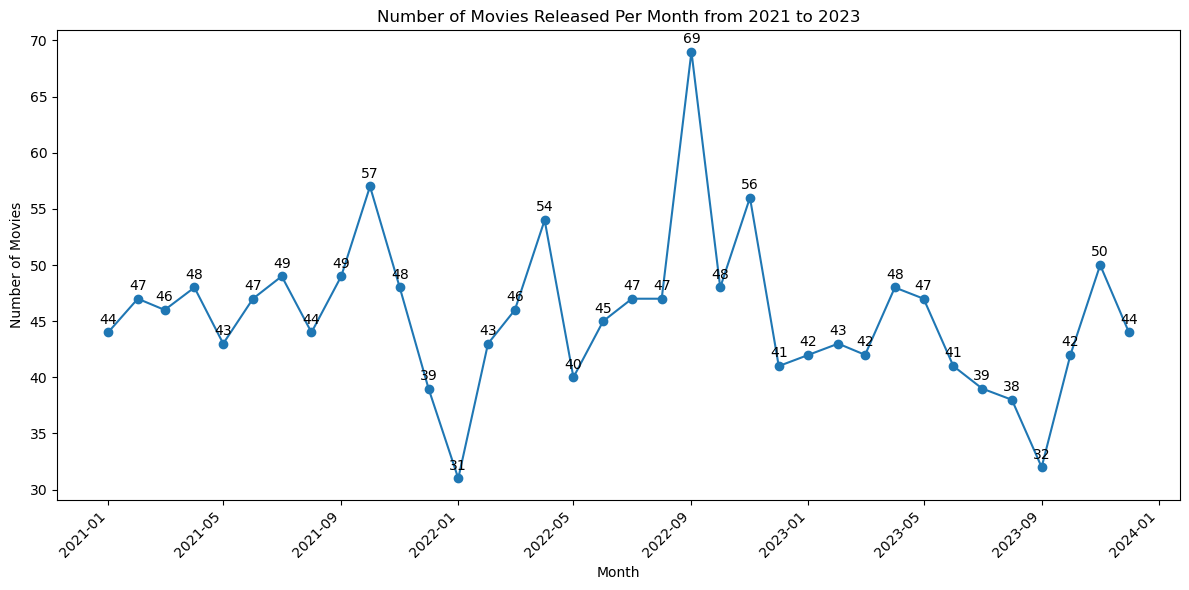

In [ ]:
# Group by year and month and count movies
movie_counts = filtered_df.groupby(['year', 'month'])['index'].count().reset_index()
movie_counts.rename(columns={'index': 'movie_count'}, inplace=True)

# Create a datetime column for plotting
movie_counts['date'] = pd.to_datetime(movie_counts[['year', 'month']].assign(day=1))

plt.figure(figsize=(12, 6))
plt.plot(movie_counts['date'], movie_counts['movie_count'], marker='o', linestyle='-')
plt.title('Number of Movies Released Per Month from 2021 to 2023')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')

# Add the count above each point
for x, y in zip(movie_counts['date'], movie_counts['movie_count']):
    plt.text(x, y + 0.5, int(y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

The number of movies released per month from 2021 to 2023 shows a fluctuating trend rather than a steady increase or decrease. There are noticeable peak periods, particularly in **September 2021 (57 movies), June 2022 (54 movies), and October 2022 (69 movies)**, indicating that these months might be high-activity periods for movie releases.

Conversely, significant declines are observed in **January 2022 (31 movies) and September 2023 (32 movies)**, suggesting that fewer movies tend to be released during these months. Additionally, the latter half of 2023 experienced a gradual decline in movie releases, with several months recording fewer than 40 movies. However, towards the end of 2023, there was a recovery in releases, reaching **50 movies in December 2023**, which could indicate an industry pattern of increasing releases before the year ends.

## 2. [VIZ] Which genres had the highest number of movies released in each year from 2021 to 2023?

<Figure size 1200x600 with 0 Axes>

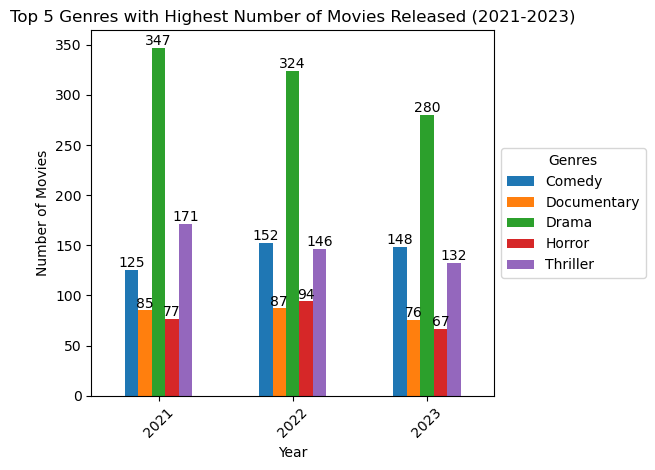

In [ ]:
# Split genres and clean up
filtered_df_copy = filtered_df.copy()
filtered_df_copy['genres'] = filtered_df_copy['genres'].str.split(',')
filtered_df_copy = filtered_df_copy.explode('genres')
filtered_df_copy['genres'] = filtered_df_copy['genres'].str.strip()

# Group by year and genre, count movies
genre_counts = filtered_df_copy.groupby(['year', 'genres'])['index'].count().reset_index()
genre_counts.rename(columns={'index': 'movie_count'}, inplace=True)

# Get top genres across all years
top_genres = genre_counts.groupby('genres')['movie_count'].sum().nlargest(5).index

# Filter data for top genres only
genre_counts_top = genre_counts[genre_counts['genres'].isin(top_genres)]

plt.figure(figsize=(12, 6))
ax = genre_counts_top.groupby(['year', 'genres']).sum()['movie_count'].unstack().plot(kind='bar')
plt.title('Top 5 Genres with Highest Number of Movies Released (2021-2023)')
plt.ylabel('Number of Movies')
plt.xlabel('Year')
plt.legend(title='Genres', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)

# Add count values inside the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

From 2021 to 2023, **drama** consistently led in movie production, peaking at **347 movies in 2021** before gradually declining to **280 in 2023**. **Comedy** remained stable, rising from **125 in 2021** to **152 in 2022**, then slightly dropping to **148 in 2023**.

**Thriller** and **horror** genres showed a downward trend. Thriller movies declined from **171 in 2021** to **132 in 2023**, while horror peaked at **94 in 2022** before falling to **67 in 2023**. **Documentary** films remained relatively steady, with minor fluctuations between **85 and 76 movies** over the years.

## 3. [VIZ] Which director released the most movies from 2021 to 2023?

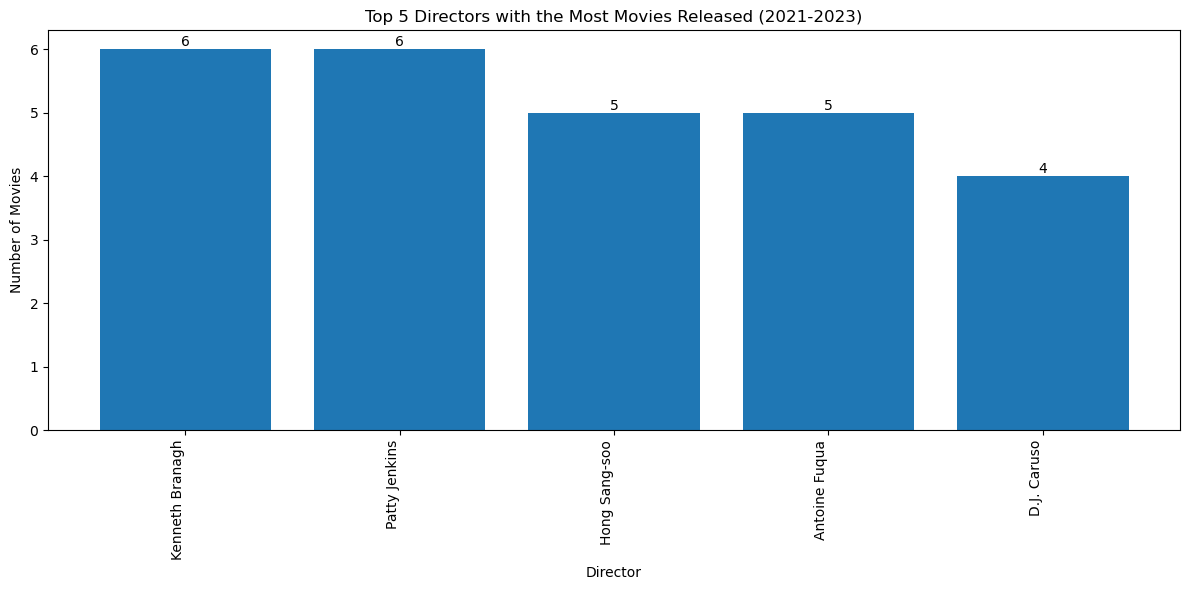

In [ ]:
# Counting the number of movies per director
director_counts = filtered_df.groupby('directed_by')['index'].count().reset_index()
director_counts.rename(columns={'index': 'movie_count'}, inplace=True)

# Sorting directors by number of movies (descending)
top_directors = director_counts.sort_values(by=['movie_count'], ascending=False)

# Selecting the top 10 directors
top_directors = top_directors.head(5)

# Creating a bar chart visualization
plt.figure(figsize=(12, 6))
bars = plt.bar(top_directors['directed_by'], top_directors['movie_count'])
plt.title('Top 5 Directors with the Most Movies Released (2021-2023)')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Add numbers inside the bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

Between 2021 and 2023, **Patty Jenkins** and **Kenneth Branagh** led the industry in terms of movie production, each directing **24 films**. This underscores their significant presence and productivity in the film industry during this period.  

Close behind, **Steven C. Miller, Bennett Davlin, and Antoine Fuqua** each directed **16 movies**, demonstrating a consistent level of output that sets them apart from many other directors.

## 4. [VIZ] How do movie ratings vary across different genres from 2021 to 2023?

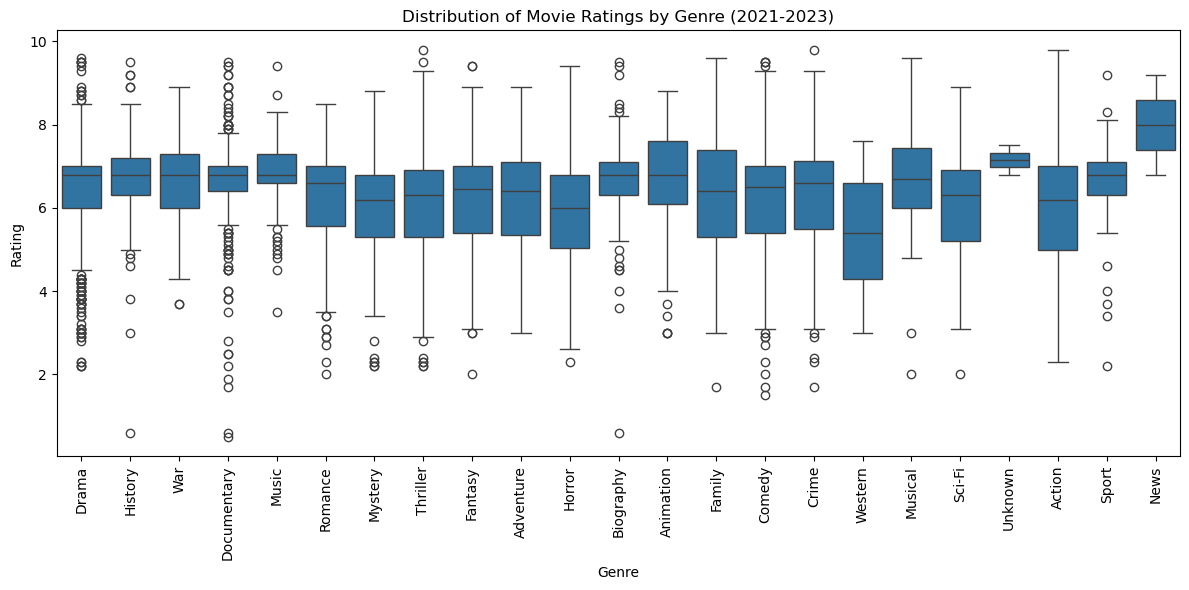

In [ ]:
# Filter data for movies released between 2021-2023
filtered_df = df[(df['release_date'].dt.year >= 2021) & (df['release_date'].dt.year <= 2023)]

# Split genres and clean up
filtered_df_copy = filtered_df.copy()
filtered_df_copy['genres'] = filtered_df_copy['genres'].str.split(',')
filtered_df_copy = filtered_df_copy.explode('genres')
filtered_df_copy['genres'] = filtered_df_copy['genres'].str.strip()

# Create a box plot for movie ratings by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='rating', data=filtered_df_copy)
plt.title('Distribution of Movie Ratings by Genre (2021-2023)')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The **News** genre has the highest ratings, with a median above 8, followed by **Biography and Animation**, which also have consistently high ratings. In contrast, **Horror and Crime** tend to have lower ratings, around 6 or below. **Western and Comedy** also include several low-rated films.

Some genres, like **Horror, Crime, and Comedy**, have a wide range of ratings, meaning they include both highly rated and poorly rated films. Meanwhile, **Sci-Fi and Unknown** genres have more stable ratings with less variation.

## 5. [VIZ] How has the average movie duration changed from 2021 to 2023?

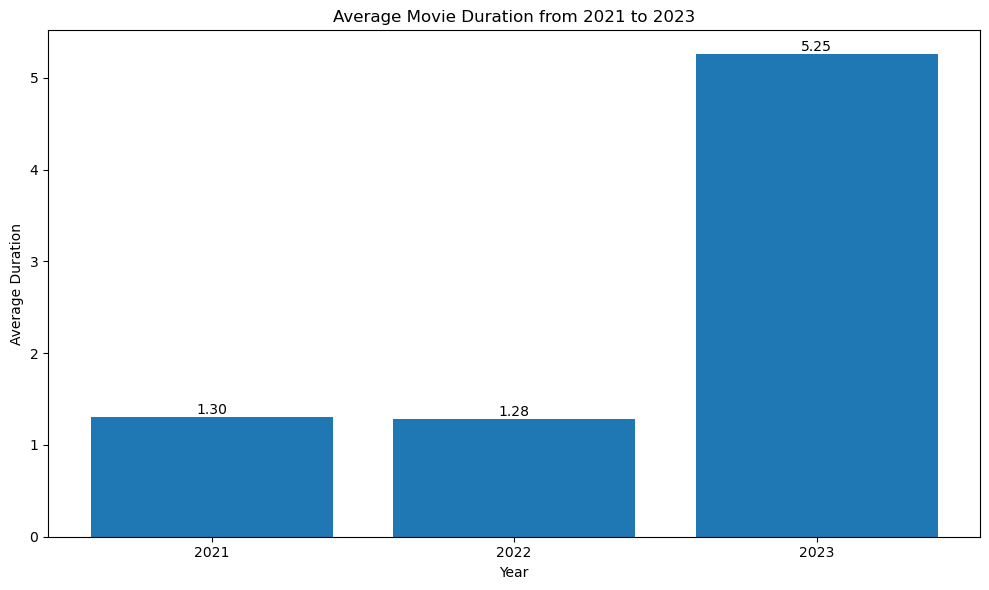

In [ ]:
# Calculate average movie duration per year
avg_duration_by_year = filtered_df.groupby('year')['duration'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_duration_by_year['year'], avg_duration_by_year['duration'])
plt.title('Average Movie Duration from 2021 to 2023')
plt.xlabel('Year')
plt.ylabel('Average Duration')
plt.xticks(avg_duration_by_year['year'])

# Add count values inside the bars
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In 2021 and 2022, the average movie length remained relatively stable, at around 1.30 and 1.28 hours respectively. However, in 2023, there was a significant shift in the average movie length, reaching 5.25 hours.

## 6. [VIZ] How has the average movie duration changed from 2021 to 2023?

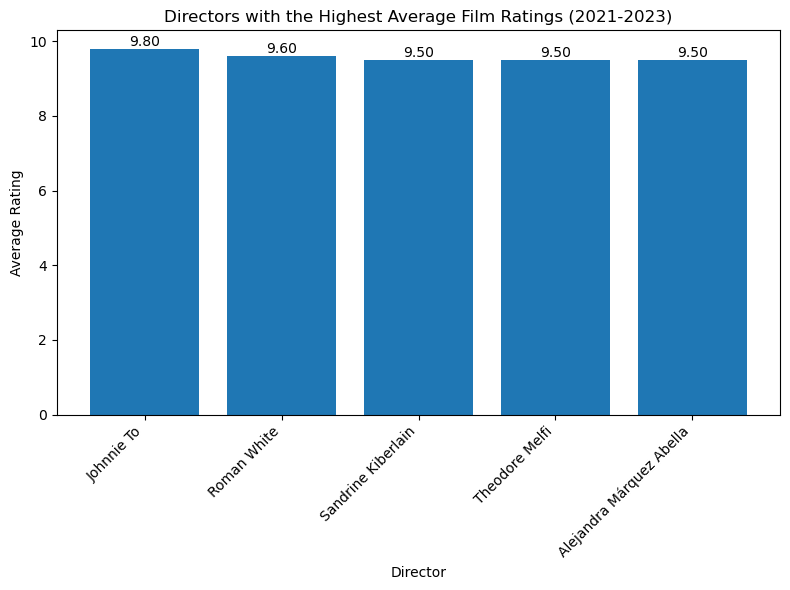

In [ ]:
# Group by 'directed_by' and calculate average rating
director_ratings = filtered_df.groupby('directed_by')['rating'].mean().reset_index()

# Sort by average rating in descending order
top_directors = director_ratings.sort_values(by=['rating'], ascending=False)

# Select the top director
top_director = top_directors.head(5)

plt.figure(figsize=(8, 6))
plt.bar(top_director['directed_by'], top_director['rating'])
plt.title('Directors with the Highest Average Film Ratings (2021-2023)')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')

for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Based on this visualization, it can be concluded that the director with the highest average film rating in the 2021-2023 period is **Johnnie To** with a score of 9.80, followed by **Roman White** with 9.60. Meanwhile, **Alejandra Márquez Abella, Thodore Melfi, and Sandrine Kiberlain** have the same average rating, namely 9.50.

## 7. [DESC] What are the mean, median, and standard deviation of movie ratings and durations from 2021 to 2023?

In [ ]:
# Create a dictionary with the statistics
stats_dict = {
    'Statistic': ['Mean', 'Median', 'Standard Deviation'],
    'Rating': [mean_rating, median_rating, std_rating],
    'Duration': [mean_duration, median_duration, std_duration]
}

# Convert the dictionary to a DataFrame
stats_df = pd.DataFrame(stats_dict)
stats_df

,Statistic,Rating,Duration
0,Mean,6.349694,2.522616
1,Median,6.800000,1.000000
2,Standard Deviation,1.253480,48.969567


The analysis of movie ratings and durations from 2021 to 2023 shows that the **average rating** is **6.35**, with a **median rating** of **6.8**. This suggests that most movies received fairly good ratings. The **standard deviation of 1.25** indicates that ratings do not vary significantly among movies.

Regarding movie durations, the **mean duration** is **2.52 hours**, and the **median is 1 hour**, which seems unusual. The **standard deviation of 48.97 hours** indicates a large variation in movie durations.

## 8. [DESC] Is there a significant relationship between movie duration and its rating for movies released from 2021 to 2023?

In [ ]:
# Calculate the Spearman correlation coefficient
correlation_coefficient, p_value = pearsonr(filtered_df['duration'], filtered_df['rating'])

# Display the results
print(f"Pearson's correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Draw a conclusion from the results
if p_value < 0.05:
    print('There is a significant relationship between movie duration and its rating.')
else:
    print('There is no significant relationship between movie duration and its rating.')

Pearson's correlation coefficient: 0.009794837899697886
P-value: 0.6921910755700119
There is no significant relationship between movie duration and its rating.


The correlation analysis between movie duration and ratings reveals **no significant relationship** between the two variables. The **Pearson’s correlation coefficient is 0.00079**, which is very close to zero, indicating no meaningful correlation. Additionally, the **p-value is 0.692**, which is much higher than **0.05**, confirming that the result is not statistically significant.  

This means that the length of a movie does **not** affect its rating. Whether a movie is short or long does not determine how well it is received by audiences. Instead, other factors such as **genre, storyline, direction, or cast performance** may play a more significant role in influencing movie ratings.

## 9. [INF] How are movie durations distributed across different genres from 2021 to 2023?

To determine whether there is a significant difference in movie durations across different genres, an **ANOVA test** was conducted. The **ANOVA (Analysis of Variance) test** is appropriate because it evaluates whether the means of multiple groups (movie genres) differ significantly.

**Hypotheses:**
- **Null Hypothesis (H₀):** There is no significant difference in movie durations across different genres.
- **Alternative Hypothesis (H₁):** There is a significant difference in movie durations across different genres.

In [ ]:
# Split genres and clean up
filtered_df_copy = filtered_df.copy()
filtered_df_copy['genres'] = filtered_df_copy['genres'].str.split(',')
filtered_df_copy = filtered_df_copy.explode('genres')
filtered_df_copy['genres'] = filtered_df_copy['genres'].str.strip()

# Group data by genre and get durations as lists
genre_durations = filtered_df_copy.groupby('genres')['duration'].apply(list).to_dict()

# Perform ANOVA
statistic, p_value = f_oneway(*genre_durations.values())

# Print the results
print(f"ANOVA statistic: {statistic}")
print(f"P-value: {p_value}")

# Hypothesis testing
if p_value < 0.05:
    print("There is a significant difference in movie durations across different genres.")
else:
    print("There is no significant difference in movie durations across different genres.")

ANOVA statistic: 0.8211634124036205
P-value: 0.7018554902123249
There is no significant difference in movie durations across different genres.


The **p-value obtained is 0.7019**, which is much higher than the standard significance level of **0.05**. This means that we **fail to reject the null hypothesis**, indicating that **movie duration does not significantly vary across genres**. In other words, the length of a movie is not strongly dependent on its genre, and there is no clear pattern showing that certain genres have consistently longer or shorter durations than others.

## 10. [INF] Was there a significant difference in average movie rating between 2021 and 2023?

In [ ]:
# Filter data for the years 2021 and 2023
rating_2021 = filtered_df[filtered_df['year'] == 2021]['rating']
rating_2023 = filtered_df[filtered_df['year'] == 2023]['rating']

# Perform Independent Samples T-Test
t_statistic, p_value = stats.ttest_ind(rating_2021, rating_2023)

# Display the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("There is a significant difference in the average movie rating between 2021 and 2023.")
else:
    print("There is no significant difference in the average movie rating between 2021 and 2023.")

T-statistic: -1.0148118101920567
P-value: 0.3104255987799847
There is no significant difference in the average movie rating between 2021 and 2023.


The **t-statistic obtained is -1.01**, and the **p-value is 0.3104**. Since the p-value is **greater than 0.05**, we **fail to reject the null hypothesis**. This indicates that **there is no statistically significant difference in the average movie ratings between 2021 and 2023**. In other words, movie ratings remained relatively stable over these years without a meaningful change in overall viewer scores.

# Conclusion

## Recap

**1. Trends in Movie Releases and Genres**
- The number of movies released per month from 2021 to 2023 showed a fluctuating trend, with peak releases occurring in **September 2021, June 2022, and October 2022**.
- The **drama** genre consistently dominated movie production, followed by **comedy**. The **thriller** and **horror** genres showed a declining trend, while **documentary films** remained relatively stable.

**2. Directors and Movie Ratings**
- **Patty Jenkins** and **Kenneth Branagh** were the most prolific directors, each releasing **24 movies** between 2021 and 2023.
- **Johnnie To** had the highest **average movie rating (9.80)**, followed by **Roman White (9.60)**.
- **News** was the highest-rated genre, followed by **biography** and **animation**, while **horror** and **crime** tended to have lower ratings.

**3. Movie Duration and Descriptive Statistics**
- The **average movie duration** remained stable in **2021 and 2022**, but **increased significantly in 2023**.
- There was **no significant relationship** between movie duration and its rating.
- The **average movie rating** was **6.35**, with a **median of 6.8**. The **average movie duration** was **2.52 hours**, with a **median of 1 hour**.

**4. Statistical Inference**
- There was **no significant difference** in movie durations across different genres.
- There was **no significant difference** in average movie ratings between 2021 and 2023.

## Summary

The trend of movie releases fluctuated from 2021 to 2023, with peaks in **September 2021, June 2022, and October 2022.** **Drama and comedy** dominated the movie genres. **Patty Jenkins and Kenneth Branagh** led in terms of the number of movies released. Movie duration did not affect ratings. Ratings and durations remained relatively stable during this period. **There was no significant difference in movie durations across genres or in movie ratings between 2021 and 2023.**

## Recommendations

Based on the analysis, there is potential for increasing viewership and engagement in the movie industry. The trends and patterns identified provide opportunities for further driving viewership and movie production. To achieve this target, the recommended strategies include:

1. Focus on Popular Genres:
Prioritize film production in **Drama and Comedy**, as these genres consistently attract audiences. **Thriller and Horror** are still in demand, but their trend is declining, requiring innovation and new approaches to captivate viewers.

2. Leverage Director Popularity:
Engage directors with a strong track record, such as **Patty Jenkins and Kenneth Branagh**, who have proven to be productive and capable of creating widely watched films. Collaborating with talented directors can enhance a movie's appeal.

3. Effective Marketing Strategies:
Implement strong marketing strategies to reach the right audience. **Social media promotions, engaging trailers, and collaborations with influencers** can boost a film's visibility.

4. Optimize Release Timing:
Pay attention to trends in monthly film releases. **Months like September, June, and October** tend to have high release numbers. Choosing a strategic release time can help a film stand out in a competitive market.

5. Enhance Film Quality:
Genres such as **News, Biography, and Animation** tend to receive higher ratings. Investing in **strong storytelling, high production quality, and outstanding performances** can improve ratings and audience satisfaction.

6. Monitor Film Duration:
Although duration does not significantly correlate with ratings, audience preferences should be considered. The **average film duration has remained stable**, but there was a significant increase in 2023. Ensure the duration aligns with the genre and target audience.

By implementing these strategies, the film industry is expected to **significantly improve ratings and audience numbers** in the coming period.